# Histogramming With Bayesian Blocks

The Bayesian Block algorithm, originally developed for applications in astronomy, can be used to improve the binning of histograms in high energy physics (HEP). The visual improvement can be dramatic, and more importantly, this algorithm produces histograms that accurately represent the underlying distribution while being robust to statistical fluctuations. The key concept behind Bayesian Blocks is that variable-width bins are determined for a given distribution, such that the data within each bin is consistent with a uniform distribution across the range of that bin.  This reduces the appearance of statistical fluctuations while still capturing the form of the underlying distribution.

For more information on the algorithm and implementation, see:

1. [Bayesian Blocks Algorithm, Scargle et al.](https://arxiv.org/pdf/1207.5578.pdf)
2. [Bayesian Blocks in HEP, Pollack et al.](https://arxiv.org/pdf/1708.00810.pdf)

For code documentation, see: http://scikit-hep.org/api/modeling.html

## Using Bayesian Blocks Binning

Bayesian Blocks binning options are available as part of **Scikit-HEP**'s histogramming packages.  Below is a simple example:

In [1]:
import numpy as np
from skhep.visual import MplPlotter as skh_plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,6)

np.random.seed(1001)
data = np.random.laplace(size=10000)

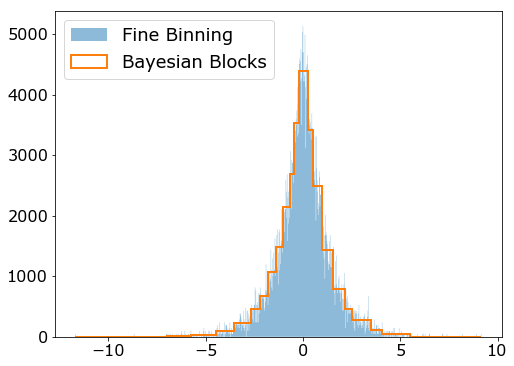

In [2]:
_ = skh_plt.hist(data, bins=1000, scale='binwidth', label='Fine Binning')
_ = skh_plt.hist(data, bins='blocks', scale='binwidth', label='Bayesian Blocks', histtype='step')
plt.legend(loc=2)
plt.show()

To call Bayesian Blocks within the `MplPlotter.hist` plotting function, simply set `bins='blocks'`.  For appropriate visualization, one should typically also use `scale='binwidth'`.  This divides each bin by its width, which is important for capturing the overall shape of the underlying distribution.  Without using this argument, the histogram will look jagged (a consequnce of using variable-width binning).


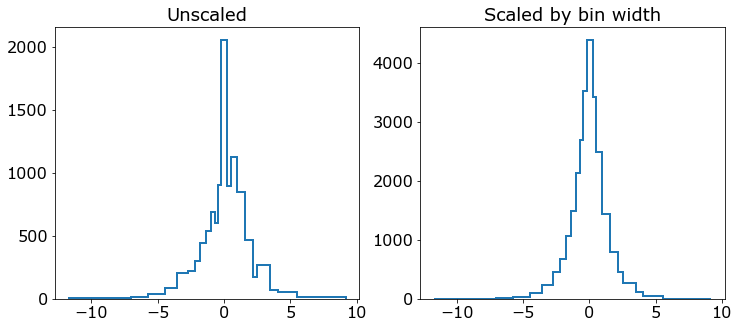

In [3]:
fig, axes = plt.subplots(ncols=2, figsize=(12,5))
_ = skh_plt.hist(data, bins='blocks', label='Bayesian Blocks', histtype='step', ax=axes[0])
axes[0].set_title('Unscaled')
_ = skh_plt.hist(data, bins='blocks', scale='binwidth', label='Bayesian Blocks', histtype='step', ax=axes[1])
axes[1].set_title('Scaled by bin width')
plt.show()

The user has control over an additional parameter to determine how many bins are generated by the Bayesian Blocks algorithm.  The `p0` parameter (valid between 0 and 1) determines how strictly the algorithm determines bin edges.  A small `p0` will be more robust to statistical fluctuations in the data, but could be overly coarse.  Conversely, a large `p0` will result in a finer binning, but could isolate spurious fluctuations in the data.

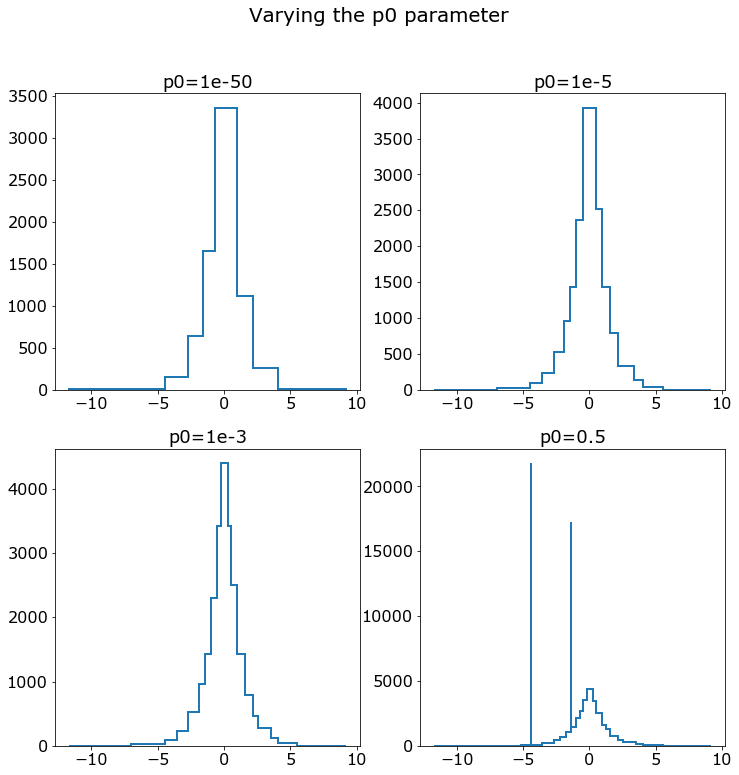

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
_ = skh_plt.hist(data, bins='blocks', scale='binwidth', histtype='step', ax=axes[0][0], p0=1e-50)
axes[0][0].set_title('p0=1e-50')
_ = skh_plt.hist(data, bins='blocks', scale='binwidth', histtype='step', ax=axes[0][1], p0=1e-5)
axes[0][1].set_title('p0=1e-5')
_ = skh_plt.hist(data, bins='blocks', scale='binwidth', histtype='step', ax=axes[1][0], p0=1e-3)
axes[1][0].set_title('p0=1e-3')
_ = skh_plt.hist(data, bins='blocks', scale='binwidth', histtype='step', ax=axes[1][1], p0=0.5)
axes[1][1].set_title('p0=0.5')
fig.suptitle('Varying the p0 parameter')
plt.show()

The optimal value of `p0` differs, depending on the number of data points and the nature of the underlying distribution.  It typically must be determined empirically, but in general the value of `p0` should be inversely proportional the size of the input dataset.

## Comparison with Other Binning Methods

Because Bayesian Blocks determines variable-width binning, the algorithm can provide a more optimal set of bins for a given distribution, especially if that distribution varies greatly in density.  Below are some examples of Bayesian Blocks and other popular binning methods.

**A rapidly falling distribution:**
![Jet Pt Spectrum](./hists_jPT.png)

**An asymmetric, peaked distribution:**
![Muon Pt Spectrum](./hists_MuPT.png)

**Two peaks of different widths:**
![Double Laplacians](./hists_2LP.png)

*Brian Pollack, 2018*